In [95]:
import torch
import numpy as np

### Accessing attributes and slicing
Seems to work the same as NumPy

In [96]:
a = torch.from_numpy(np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]]))
a

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

In [97]:
a[0][0]

tensor(1., dtype=torch.float64)

In [98]:
a[1, 2]

tensor(6., dtype=torch.float64)

In [99]:
a[::, 1]

tensor([2., 5., 8.], dtype=torch.float64)

In [100]:
a[:2, :2]

tensor([[1., 2.],
        [4., 5.]], dtype=torch.float64)

### Creating Tensors
You can create tensors in a few ways.

In [101]:
b = torch.ones(3)
c = torch.zeros(2, 3, 2)
d = torch.tensor([[1.,2.,3.],[4.,5.,6.]])

print(b, c, d)
print (b.shape, c.shape, d.shape)

tensor([1., 1., 1.]) tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]]) tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([3]) torch.Size([2, 3, 2]) torch.Size([2, 3])


Unlike TensorFlow, you can overwrite values in tensors without calling a special method

In [102]:
b[1:] = 2
b

tensor([1., 2., 2.])

### Storage and Side effects

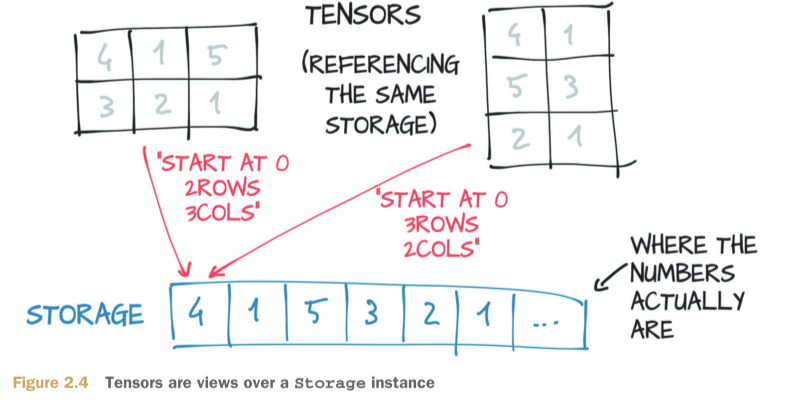

To conserve memory, subtensors (slices), transposed tensors, etc. reference the same `storage` which is a continuous block of memory. When a tensor is sliced, the storage does not change, but a new tensor is created with a different *size* (like NumPy shape), *storage offset*(the offset from the beginning of the new tensor to the beginning of storage), and *stride* (the steps needed to move one column and then one row). The tensors are all considered *views* of the storage.

***THIS MEANS THAT ALTERATIONS TO A SUBTENSOR WILL HAVE A SIDE EFFECT ON THE ORIGINAL TENSOR***

In [103]:
points = torch.tensor([[1.,4],[2.,3]])
sub_points = points[1]

sub_points[0] = 77 # this will alter the number in storage and therefore alter all views 

print(points)

tensor([[ 1.,  4.],
        [77.,  3.]])


If you need to avoid this behaviour you can `clone()` a subtensor which will initialize new storage.

In [104]:
points = torch.tensor([[1.,4],[2.,3]])
sub_points = points[1].clone()

sub_points[0] = 77 # sub_points refer to a different storage so we can change it with no side effects

print(points)

tensor([[1., 4.],
        [2., 3.]])


To test if two tensors share the same storage you can use `id(<tensor>.storage())`.

In [105]:
points = torch.tensor([[1.,4],[2.,3]])
sub_points = points[1]

id(points.storage()) == id(sub_points.storage())

True

### Transposing
A rank 2 matrix

In [106]:
points = torch.tensor([[1.,2.,3.],[4.,5.,6.]])
points

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [107]:
points_t = points.T
points_t

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

You can also transpose a rank 3+ tensor by using the `transpose()` method and specifying which axes should be transposed.

In [108]:
ones = torch.ones(2,3,4)
ones

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [109]:
ones_t = ones.transpose(0,1)
ones_t.shape

torch.Size([3, 2, 4])

In [110]:
ones_t

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

### Contiguous Tensors
A tensor is *contiguous* if its storage is laid out by row, column, layer, etc. (right most value in shape moving left). Contiguous tensors can improve performance. You can use the `contiguous` method to shuffle a tensors stride, and change the storage when creating a subtensor.

In [111]:
tens = torch.tensor([[1,2,3],[4,5,6]])
tens.is_contiguous()

True

In [112]:
tens_t = tens.T
tens_t.is_contiguous()

False

In [113]:
tens_t_cont = tens_t.contiguous()
tens_t_cont.is_contiguous()

True

### Numeric Types
You `dtype` argument to tensor constructors specifies the numerical data type to be contained within the tensor. The `dtype` argument is deliberately similar to the NumPy `dtype` argument.

The possible numerical types are:<br>
`torch.float32` or `torch.float` ,<br>
`torch.float64` or `torch.double`<br>
`torch.float16` or `torch.half`<br>
`torch.int8` - signed 8-bit<br>
`torch.uint8` - unsigned 8-bit<br>
`torch.int16` or `torch.short`<br>
`torch.int32` or `torch.int`<br>
`torch.int64` or `torch.long`<br>

By default a `torch.Tensor` contains 32-bit floats. You can check this with the attribute `dtype`:

In [114]:
test_tensor = torch.Tensor([1,2,3])
test_tensor.dtype

torch.float32

You can specify the `dtype` be using the `to` method.

In [115]:
double_tensor = torch.Tensor([1,2,3]).to(torch.double)
double_tensor.dtype

torch.float64

### NumPy Interoperability
You can cast to and from NumPy arrays like so:

In [116]:
np_arr = np.array([[1,2,3],[4,5,6]])

np_to_tensor = torch.from_numpy(np_arr)
np_to_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [117]:
test_tensor = torch.Tensor([7,8,9])
tensor_2_np = test_tensor.numpy()
tensor_2_np

array([7., 8., 9.], dtype=float32)

### Named Tensors
You can name the attributes within a tensor in order to keep track of what is what. Only specific factory functions can make use of this feature. [See the documentation](https://pytorch.org/docs/stable/named_tensor.html) for more info.

In [118]:
named_tensor = torch.randn(2,3, names=('column','row'))
named_tensor

tensor([[ 1.0778,  1.5739, -2.1257],
        [-0.2502,  0.3883,  0.3842]], names=('column', 'row'))

### Serializing Tensors and Loading Serialized Tensors
You can save your tensor to a `.t` file. This is neccesary since we don't want to re-train a model everytime we reopen the program. The `.t` format is not interoperable. If you need to open the array in another format you'll have to use the *HDF5* format. See page 33 *Deep Learning with PyTorch*.

In [119]:
serial_tensor = torch.Tensor([[1,2,3],[4,5,6]]).to(torch.double)
serial_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [120]:
# you serialize the tensor with the .save function
torch.save(serial_tensor, '../chap03/serialized_tensors/test_tensor.t')

In [121]:
#reloading the tensor with the .load function
loaded_tensor = torch.load('../chap03/serialized_tensors/test_tensor.t')
loaded_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

### Moving Tensors to the GPU
Ever tensor has a notion of `device`, or where the tensor data is being placed. By default, the tensor is placed on the CPU.

In [122]:
tensor_one = torch.Tensor([1,2,3])
tensor_one.device

device(type='cpu')

You can create a tensor on the GPU by using the `.to` method and specifying the device as `cuda`.

In [123]:
tensor_two = torch.Tensor([4,5,6]).to(device='cuda')
tensor_two.device

device(type='cuda', index=0)

You can also create a GPU tensor from a CPU tensor, using the same `.to` method.

In [124]:
tensor_three = tensor_one.to(device='cuda')
tensor_three

tensor([1., 2., 3.], device='cuda:0')

You can move a tensor back to the cpu with the `.to` method

In [125]:
tensor_three = tensor_three.to(device='cpu')
tensor_three.device

device(type='cpu')

You can also skip the `.to` method and use the shorter `.cpu()` and `.cuda()` methods

In [126]:
tensor_one = tensor_one.cuda()
tensor_one.device

device(type='cuda', index=0)

In [127]:
tensor_one = tensor_one.cpu()
tensor_one.device

device(type='cpu')

### The Tensor API
Get familiar with the [PyTorch docs.](https://pytorch.org/docs/stable/index.html) For example, let's try out `torch.amax` which return the max value of each slice of the input tensor

In [128]:
a = torch.randn(6,4)
a

tensor([[ 0.2108,  2.5582, -0.5150, -0.0216],
        [-0.0387, -1.3975, -1.2998,  1.5652],
        [-0.2706, -0.8237,  0.3155, -1.2172],
        [-0.2983, -1.1522, -0.7777, -1.2288],
        [-0.6369,  0.4251,  0.4696,  0.1906],
        [ 0.1827, -1.2663,  0.9848,  1.1677]])

In [129]:
a.shape

torch.Size([6, 4])

In [130]:
torch.amax(a,1) # grab the max in the second axis, ie. max in each row

tensor([ 2.5582,  1.5652,  0.3155, -0.2983,  0.4696,  1.1677])

In [131]:
torch.amax(a,0) # Grab the max in the first axis, ie. max in each column

tensor([0.2108, 2.5582, 0.9848, 1.5652])

### In-Place Operations
A number of operations exist only as methods of the `tensor` object. These methods are recognized by their trailing underscore. These methods operate *in place* instead of returning a new tensor.

In [135]:
a = torch.Tensor([-1,-2,3])
b = a.absolute() #this method DOES NOT modify tensor a in place
print(a, b)

tensor([-1., -2.,  3.]) tensor([1., 2., 3.])


In [136]:
a.absolute_() # this method MODIFIES THE TENSOR IN PLACE
a

tensor([1., 2., 3.])